# Exploratory Data Analysis (EDA)

Author: Santosh Yadaw
Email: santoshyadawprl@gmail.com

## 1. Setup

In [1]:
# Imports
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tqdm.auto import tqdm

from sklearn.feature_extraction.text import CountVectorizer


tqdm.pandas()

# nltk.download("stopwords")
# nltk.download('wordnet')

In [2]:
# Constants
BASE_DIR = os.path.dirname(os.getcwd()) 
print(f"BASE_DIR: {BASE_DIR}")

DATA_FOLDER = os.path.join(BASE_DIR,"data", "raw")
print(f"DATA_FOLDER: {DATA_FOLDER}")

RAW_DATA_PATH = os.path.join(DATA_FOLDER, "DS2-assessment-simulated-employee-text.xlsx")
print(f"RAW_DATA_PATH: {RAW_DATA_PATH}")

stop_words = set(stopwords.words('english'))

BASE_DIR: /home/jupyter/Topic-Review-Extraction-HR
DATA_FOLDER: /home/jupyter/Topic-Review-Extraction-HR/data/raw
RAW_DATA_PATH: /home/jupyter/Topic-Review-Extraction-HR/data/raw/DS2-assessment-simulated-employee-text.xlsx


In [3]:
# Read Data
raw_data = pd.read_excel(RAW_DATA_PATH)
raw_data.head()

,unique_identifier,employee_feedback,department
0,3565,There's a culture of blame within the company ...,Dept A
1,7323,The company's approach to feedback and perform...,Dept A
2,5008,"While page limits have been set, some departme...",Dept A
3,3460,na,Dept A
4,2179,The culture of collaboration within our team i...,Dept A


## 2. Data Exploration

In [4]:
# Check entire data frame
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   unique_identifier  155 non-null    int64 
 1   employee_feedback  155 non-null    object
 2   department         155 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.8+ KB


Text(0.5, 1.0, 'Count plot of Top 10 unique identifiers')

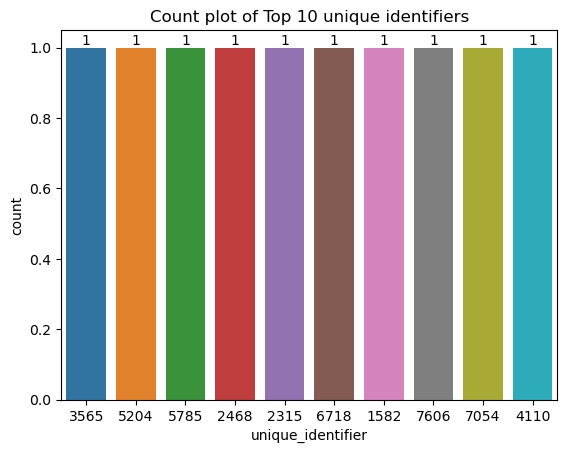

In [5]:
# Plot the unique number of identifers - Top 10
ax1 = sns.countplot(x ='unique_identifier', data = raw_data, order = raw_data["unique_identifier"].value_counts(ascending=False).index[:10])
ax1.bar_label(ax1.containers[0])
plt.title("Count plot of Top 10 unique identifiers")

Text(0.5, 1.0, 'Count plot of Bottom 10 unique identifiers')

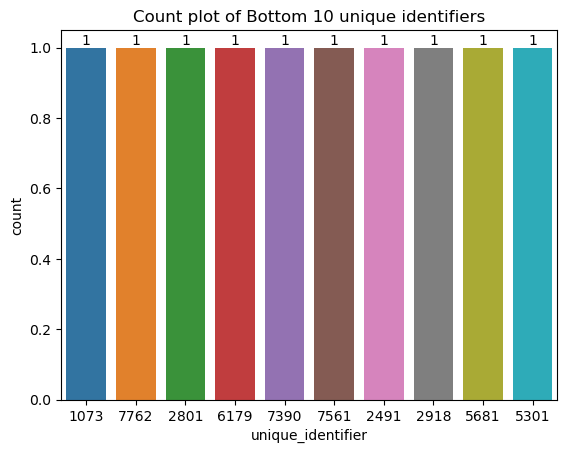

In [6]:
# Plot the unique number of identifers - Bottom 10
ax2 = sns.countplot(x ='unique_identifier', data = raw_data, order = raw_data["unique_identifier"].value_counts(ascending=True).index[-10:])
ax2.bar_label(ax2.containers[0])
plt.title("Count plot of Bottom 10 unique identifiers")

Text(0.5, 1.0, 'Count plot of departments')

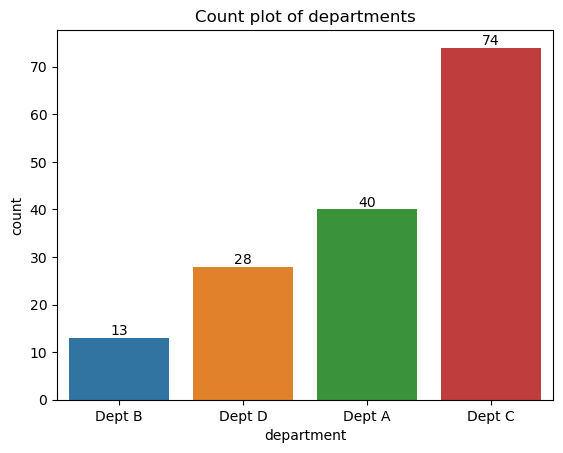

In [7]:
# Plot the count plot for departments
ax3 = sns.countplot(x ='department', data = raw_data, order = raw_data["department"].value_counts(ascending=True).index)
ax3.bar_label(ax3.containers[0])
plt.title("Count plot of departments")

In [8]:
# Word count for each review
raw_data["word_count"] = raw_data['employee_feedback'].apply(lambda x : len(x.split()))

In [9]:
# Mean word count for each review
raw_data["mean_word_length"] = raw_data['employee_feedback'].map(lambda rev: np.mean([len(word) for word in rev.split()]))

/opt/conda/envs/topic-extract/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/envs/topic-extract/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [10]:
# Mean sentence count for each review
raw_data['mean_sentence_length'] = raw_data['employee_feedback'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))

/opt/conda/envs/topic-extract/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/envs/topic-extract/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [11]:
raw_data.describe()

,unique_identifier,word_count,mean_word_length,mean_sentence_length
count,155.000000,155.000000,153.000000,153.000000
mean,4729.348387,24.748387,5.187148,81.609368
std,2414.157334,28.010803,1.373644,96.217130
min,1032.000000,0.000000,1.000000,1.000000
25%,2748.000000,6.000000,4.714286,39.000000
50%,4660.000000,15.000000,5.340909,71.000000
75%,6902.500000,35.000000,5.942857,105.000000
max,9867.000000,177.000000,8.250000,1072.000000


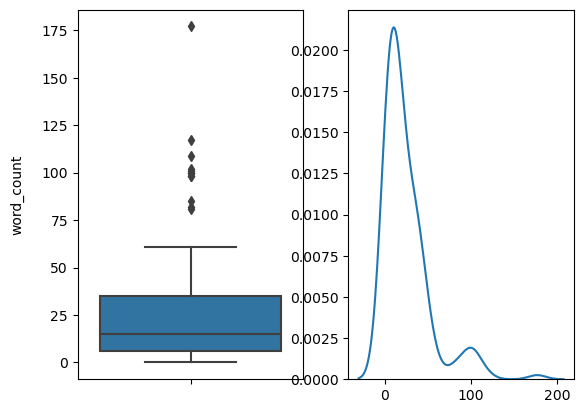

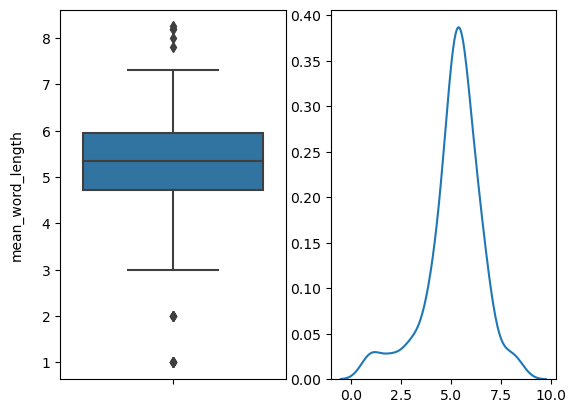

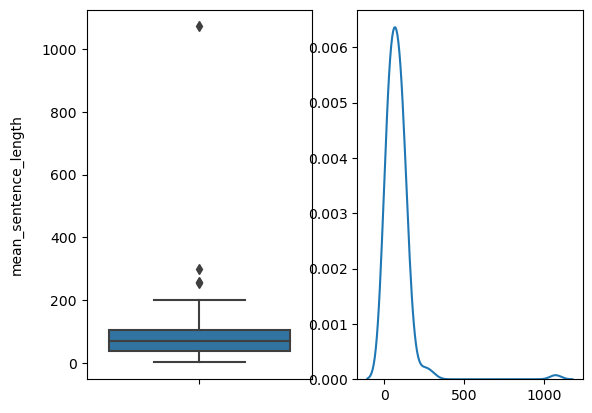

In [12]:
def visualize(col):
    """Visualizing each numeric column distribution"""
    
    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=raw_data[col])
    plt.ylabel(col, labelpad=12.5)
    
    plt.subplot(1,2,2)
    sns.kdeplot(raw_data[col])
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()
    
features = ['word_count','mean_word_length','mean_sentence_length']
for feature in features:
    visualize(feature)

In [13]:
# Identify common words
common_word_freq = pd.Series(' '.join(raw_data['employee_feedback']).split()).value_counts()[:20]
common_word_freq

and          168
to           142
the           93
I             75
is            58
be            50
more          49
are           48
my            47
a             46
in            43
of            43
for           41
work          39
feel          38
company's     37
that          36
on            32
there         31
like          26
Name: count, dtype: int64

In [14]:
# Identify uncommon words
uncommon_word_freq = pd.Series(' '.join(raw_data['employee_feedback']).split()).value_counts()[-20:]
uncommon_word_freq

adequate,       1
video           1
conferencing    1
capabilities    1
doing           1
effective.      1
appearing       1
technology.     1
transition      1
seamless        1
objective,      1
ultimate        1
unsure          1
how             1
fits            1
bigger          1
picture.        1
Driving         1
initiatives     1
impede          1
Name: count, dtype: int64

In [15]:
# Initialise the wordnet lemmatizer
lemmatizer = WordNetLemmatizer()

def process_text(text):
    # 1. Convert to lower case
    text = text.lower()

    # 2. Remove any digits and words containing digits
    text = ' '.join([word for word in text.split() if not any(c.isdigit() for c in word)])

    # 3. Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 4. Remove stop words in English
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_words]

    # 5. Lemmatize the words
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(lemmatized_tokens)

raw_data['clean_employee_feedback'] = raw_data['employee_feedback'].apply(process_text)

In [16]:
# Identify common words - after stopwords removal
common_word_freq = pd.Series(' '.join(raw_data['clean_employee_feedback']).split()).value_counts()[:20]
common_word_freq

company        63
work           50
feel           44
employee       28
team           27
like           26
would          26
make           19
feedback       17
help           16
appreciate     16
could          16
manager        16
difficult      15
however        13
within         13
goal           12
support        12
opportunity    12
effort         11
Name: count, dtype: int64

In [17]:
# Identify uncommon words
uncommon_word_freq = pd.Series(' '.join(raw_data['clean_employee_feedback']).split()).value_counts()[-20:]
uncommon_word_freq

picture              1
streamlining         1
empowering           1
included             1
miscommunications    1
considered           1
acted                1
upon                 1
implemented          1
discouraging         1
misunderstanding     1
cause                1
continuing           1
delay                1
frustration          1
conclusion           1
ideafriendly         1
look                 1
forward              1
impede               1
Name: count, dtype: int64

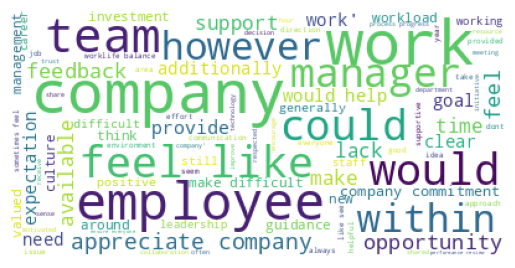

In [18]:
# Plot wordcloud

corpus = raw_data['clean_employee_feedback'].to_list()
wordcloud = WordCloud(background_color='white',stopwords=stop_words,max_words=100,max_font_size=50, random_state=42).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Term Frequency Analysis

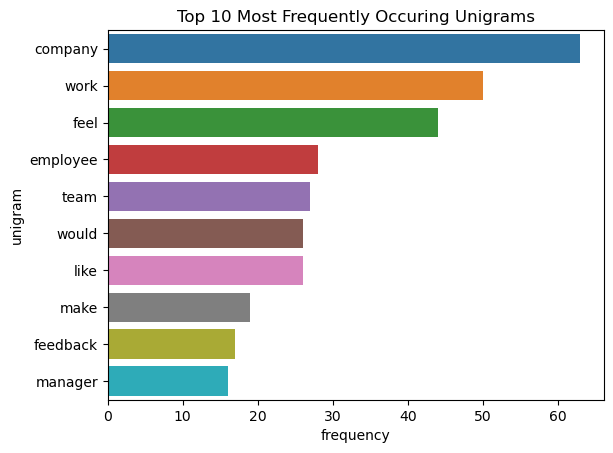

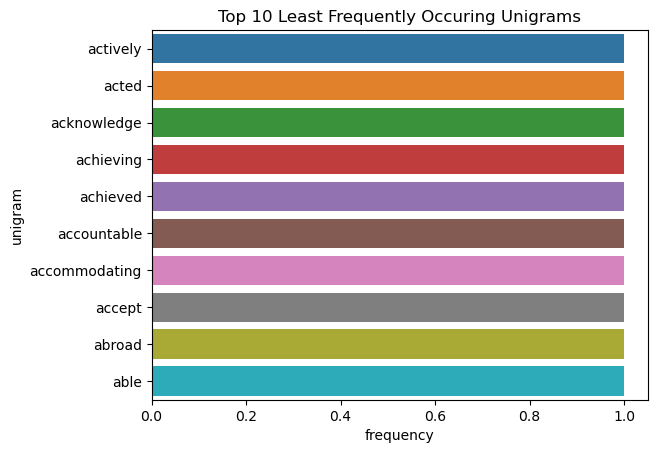

In [45]:
# Unigram
cv = CountVectorizer(ngram_range=(1,1),dtype="uint8")
unigrams = cv.fit_transform(raw_data['clean_employee_feedback'])

count_values = unigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "unigram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['unigram'][:10])
plt.title('Top 10 Most Frequently Occuring Unigrams')
plt.show()

sns.barplot(x=ngram_freq['frequency'][-10:], y=ngram_freq['unigram'][-10:])
plt.title('Top 10 Least Frequently Occuring Unigrams')
plt.show()

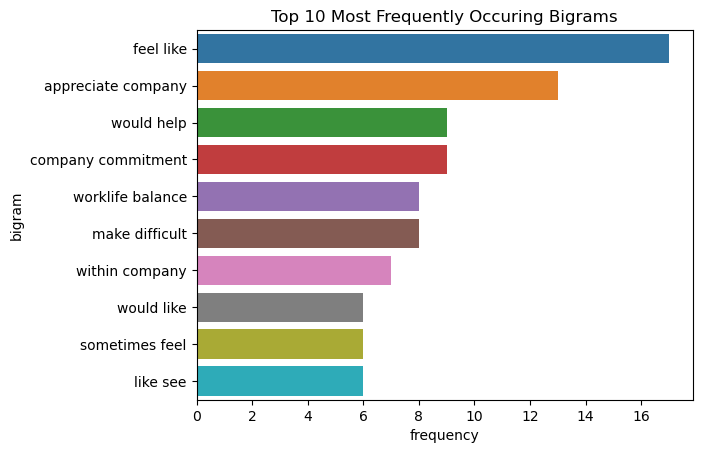

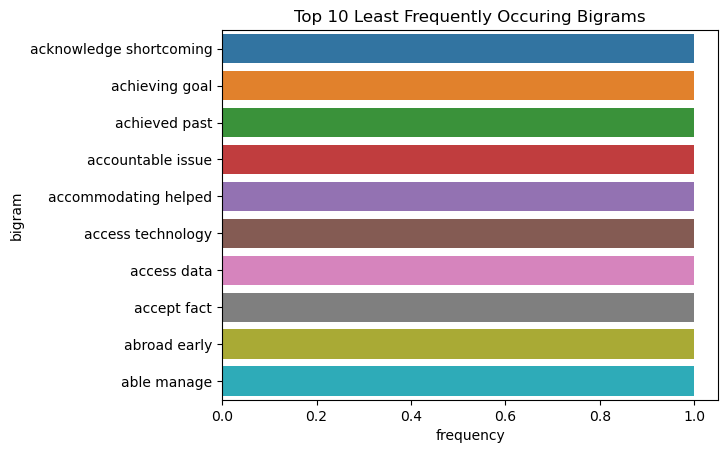

In [46]:
# Bigram
cv = CountVectorizer(ngram_range=(2,2),dtype="uint8")
bigrams = cv.fit_transform(raw_data['clean_employee_feedback'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "bigram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['bigram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

sns.barplot(x=ngram_freq['frequency'][-10:], y=ngram_freq['bigram'][-10:])
plt.title('Top 10 Least Frequently Occuring Bigrams')
plt.show()

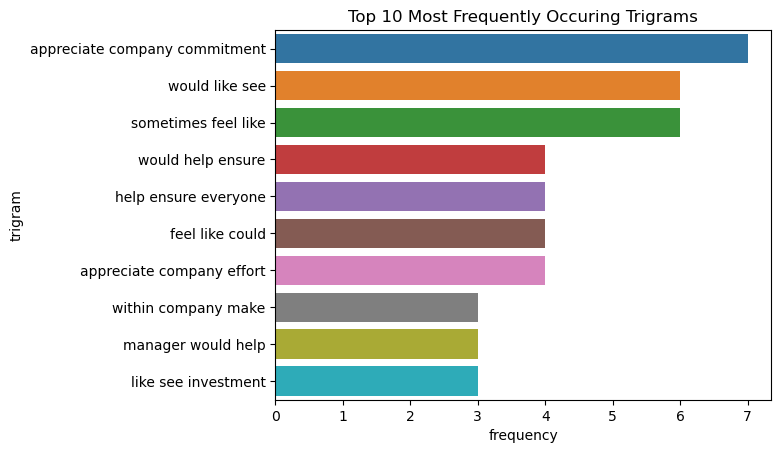

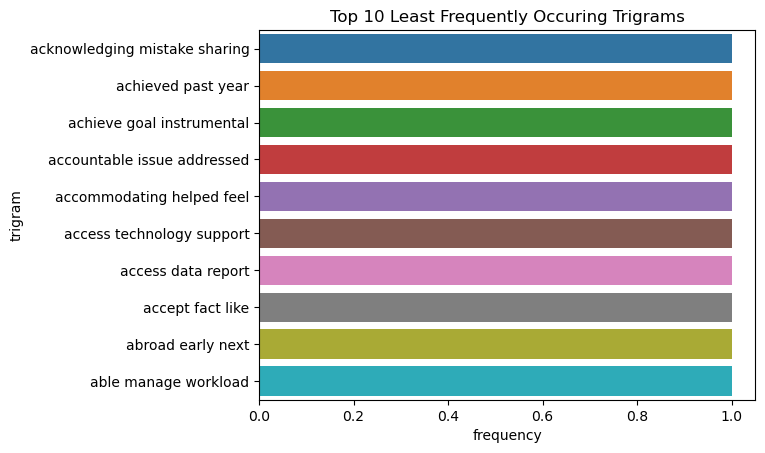

In [47]:
# Trigram
cv = CountVectorizer(ngram_range=(3,3),dtype="uint8")
trigrams = cv.fit_transform(raw_data['clean_employee_feedback'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "trigram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['trigram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

sns.barplot(x=ngram_freq['frequency'][-10:], y=ngram_freq['trigram'][-10:])
plt.title('Top 10 Least Frequently Occuring Trigrams')
plt.show()

### Observations
1. DataFrame consists of 155 samples with no missing values being observed
2. From the count plot of the unique identifiers, we can see there are no duplicate employees submission since Top 10 and bottom 10 count plots are showing 1 each
3. Data comes from 4 different departments with the highest reviews coming from department C (74 samples ~ 50% of data) while lowest coming from department B (13 samples ~ 8.3% of data)
4. The word count ranges from a minuimum of 0 words to a maximum of 177 words with an average of 24 words. The distribution is right skewed (mean > median). We do see some outliers. Word count range is important as it gives us an indicaiton of the size of the dataset we are handling with along with the variations of the words across each feedback samples.
5. The average length of the word in the feedback is around 5 characters and it is normally distributed. We do see some outliers.
6. The average length of the feedback is around 81 characters and it is right skewed. We do see a few outliers.
7. In terms of the top 20 most common words, we observe there are many stopwords present while for top 20 uncommon words, we observe more keywords appearing.
8. After preprocessing the text by removing stopwords and lemmatizing, we observe the top 20 most common keyword changes. We no longer see stopwords instead we start to see there is a pattern regarding opportunities, supporting everyone etc.
9. Based on top10 bigrams and trigrams, we can see most of the employee feedback appreciates the company's commitment and talk about manager's being helpful. Reviews seems to indicate it being somewhat positive

# END